In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import tensorflow as tf

np.random.seed(4321)

In [2]:
# Load MNIST. We don't need the labels.
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

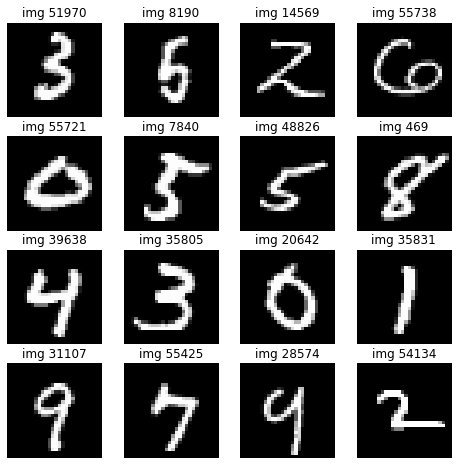

In [3]:
# Visualize numbers in mnist
def plot_images(imgs, idx, rows=4, cols=4, **kwargs):
    f, ax = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    for i in range(rows * cols):
        current_img = imgs[random_idx_X_train[i], :, :, 0]
        ax[i // cols, i % cols ].imshow(current_img, **kwargs)
        ax[i // cols, i % cols ].axis('off')
        ax[i // cols, i % cols ].set_title(f'img {random_idx_X_train[i]}')
    return f
        
random_idx_X_train = np.random.choice(range(X_train.shape[0]), 16, replace=False)
f = plot_images(X_train, random_idx_X_train, cmap='gray')
        
plt.show()

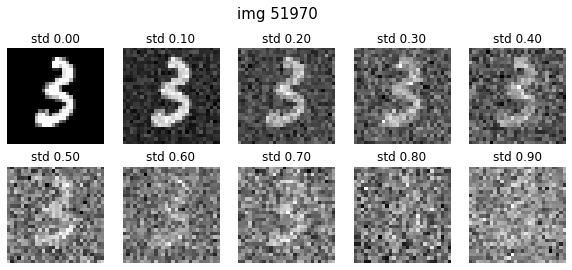

In [4]:
# Visualize gaussian noise
img = X_train[random_idx_X_train[0], :, :, 0]

f, ax = plt.subplots(2, 5, figsize=(10, 4))
f.suptitle(f'img {random_idx_X_train[0]}', fontsize=15, y=1.02)

for i in range(10):
    std = 0.1 * i
    noisy_img = img + np.random.normal(0, std, img.shape)
    ax[i // 5, i % 5].imshow(noisy_img, cmap='gray')
    ax[i // 5, i % 5].axis('off')
    ax[i // 5, i % 5].set_title(f'std {std:.2f}')
    
plt.show()

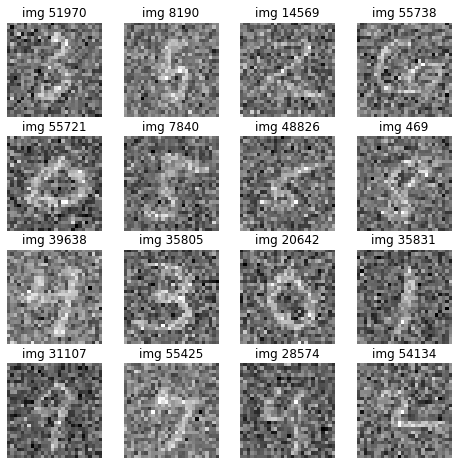

In [5]:
# Add gaussian noise to images
X_train_noise = X_train + np.random.normal(0, 0.5, X_train.shape)
X_test_noise = X_test + np.random.normal(0, 0.5, X_test.shape)

plot_images(X_train_noise, random_idx_X_train, cmap='gray')
plt.show()

In [6]:
# Create convolutional autoencoder
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (2, 2), strides=(2, 2), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (2, 2), strides=(2, 2), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (2, 2), strides=(2, 2), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(576, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(576, activation='relu'))
model.add(tf.keras.layers.Reshape((3, 3, 64)))
model.add(tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu'))
model.add(tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), activation='relu'))
model.add(tf.keras.layers.Conv2DTranspose(1, (2, 2), strides=(2, 2), activation='relu'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          2080      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          8256      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 576)               332352    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               73856     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [7]:
# Train the model
num_epochs=20
history = model.fit(X_train_noise, X_train, epochs=num_epochs)

Epoch 1/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0372
Epoch 2/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0259
Epoch 3/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0230
Epoch 4/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0218
Epoch 5/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0209
Epoch 6/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0203
Epoch 7/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0198
Epoch 8/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0194
Epoch 9/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0191
Epoch 10/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0188
Epoch 11/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0185
Epoch 12/20
1875/1875 [==============================] - 38s 20

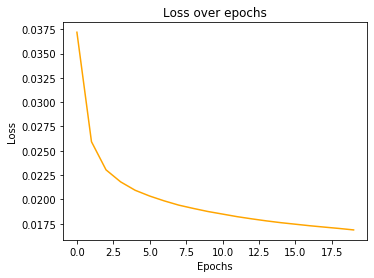

In [8]:
# Plot loss over time
loss = history.history['loss']

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(range(num_epochs), loss, color='orange')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [9]:
# Reconstruct X_test_noise 
X_test_pred = model.predict(X_test_noise)

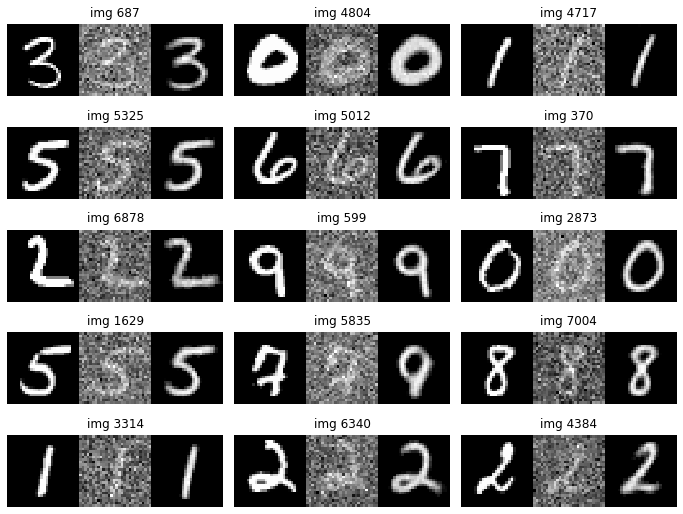

In [10]:
# Plot the original, noisy and reconstructed X_test
rows, cols = 5, 3

random_idx_X_test = np.random.choice(range(X_test.shape[0]), rows*cols, replace=False)


f = plt.figure(figsize=(12, 9))

outer_plot = gridspec.GridSpec(rows, cols, wspace=0.05, hspace=0.3)

for i in range(rows * cols):
    inner_plot = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer_plot[i], wspace=0)
    for j in range(3):
        ax = plt.Subplot(f, inner_plot[j])
        if j == 0:
            ax.imshow(X_test[random_idx_X_test[i], :, :, 0], cmap='gray')
            ax.axis('off')
        elif j == 1:
            ax.imshow(X_test_noise[random_idx_X_test[i], :, :, 0], cmap='gray')
            ax.axis('off')
            ax.set_title(f'img {random_idx_X_test[i]}', y=1.02)
        elif j == 2:
            ax.imshow(X_test_pred[random_idx_X_test[i], :, :, 0], cmap='gray')
            ax.axis('off')
        f.add_subplot(ax)

plt.show()